In [ ]:
pip install brian2

In [ ]:
pip install brian2tools

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from brian2 import *
from brian2tools import *
from brian2.units import *

In [ ]:
N_first_exc = 800
N_second_exc = 800
N_inh = 200
R = 0.6
tau = 250
V_init = 0
V_reset = -10
V_th = 50
I_first_exc = 130
I_second_exc = 110
I_inh = 0
p_first_exc = 0.1
p_second_exc = 0.08
p_inh = 0.2
p_excs = 0.05
w_first_exc = 0.7
w_second_exc = 0.8
w_inh = -8
w_excs = 0.2

In [ ]:
start_scope()
G = NeuronGroup(N_first_exc + N_second_exc + N_inh , '''dv/dt = (((V_reset - v)+(R*I))/tau ) /(ms) : 1
                                  I : 1''',
                threshold = 'v > V_th',
                reset='v = V_reset'
                )

first_exc_G =  G[ :N_first_exc]    
second_exc_G =  G[N_first_exc  : N_first_exc + N_second_exc] 
inh_G =  G[ N_first_exc + N_second_exc : ]                                                

first_exc_G.v = V_init
first_exc_G.I = I_first_exc

second_exc_G.v = V_init
second_exc_G.I = I_second_exc

inh_G.v = V_init
inh_G.I = I_inh

 
first_exc_synapse = Synapses(first_exc_G , first_exc_G, 'w:1' , on_pre = 'v += w')  
second_exc_synapse = Synapses(second_exc_G , second_exc_G , 'w:1' , on_pre = 'v += w')  
inh_synapse = Synapses(inh_G , inh_G , 'w:1' , on_pre = 'v += w')

first_exc_synapse.connect(p = p_first_exc)
first_exc_synapse.w = w_first_exc
second_exc_synapse.connect(p = p_second_exc)
second_exc_synapse.w = w_second_exc
inh_synapse.connect(p = p_inh)
inh_synapse.w = w_inh 

spike_mon_first_exc = SpikeMonitor( first_exc_G )
spike_mon_second_exc = SpikeMonitor( second_exc_G )
spike_mon_inh = SpikeMonitor(inh_G)
spike_mon_G = SpikeMonitor(G)


state_mon_first_exc_I = StateMonitor(first_exc_G , 'I' , record=True)
state_mon_first_exc_V = StateMonitor(first_exc_G , 'v' , record=True)
state_mon_second_exc_V = StateMonitor(second_exc_G , 'v' , record=True)
state_mon_second_exc_I = StateMonitor(second_exc_G , 'I' , record=True)
state_mon_G_V = StateMonitor(G , 'v' , record=True)


run(1000*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup', using method 'exact' (took 0.08s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 2s


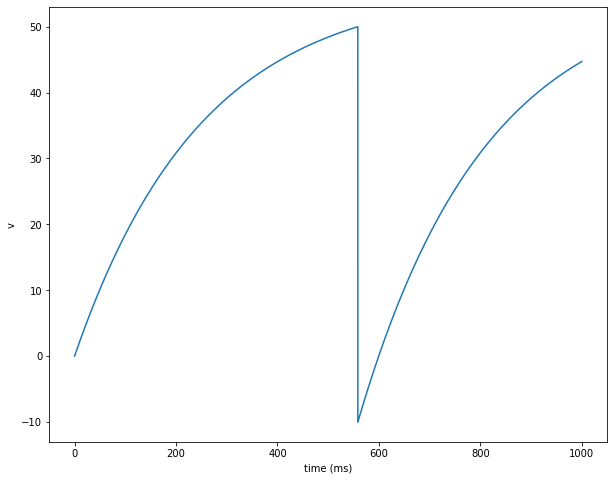

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_second_exc_V[100])

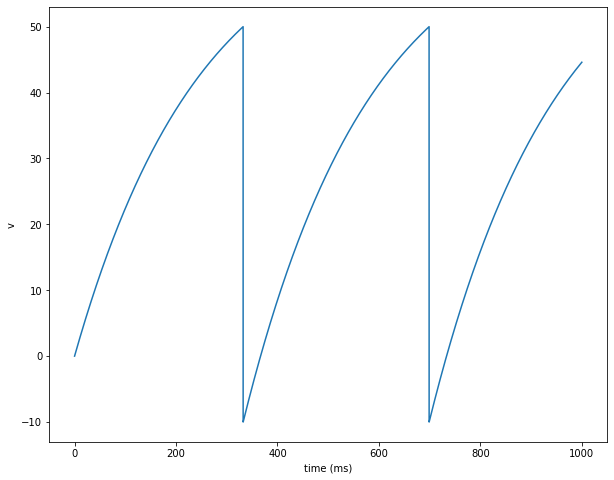

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_first_exc_V[100])

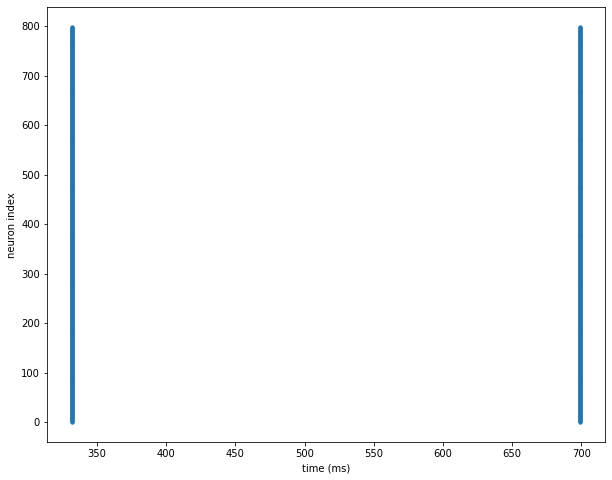

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_first_exc)

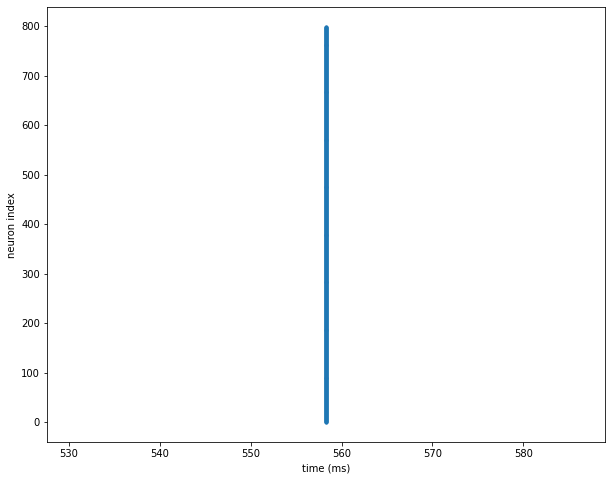

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_second_exc)

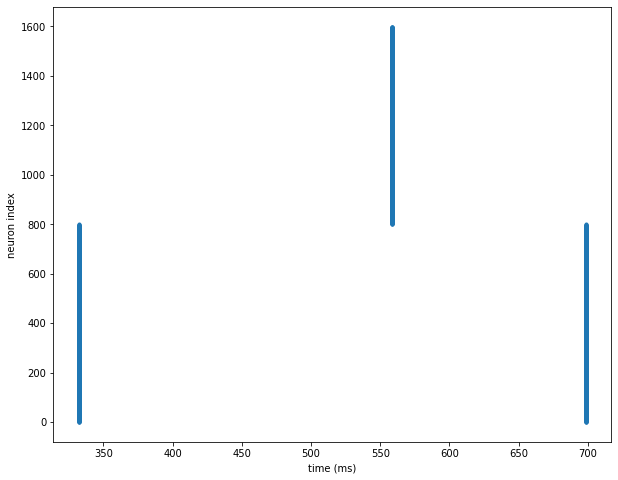

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_G)

In [ ]:
print(f"total spike = {spike_mon_G.num_spikes} ")
print(f"first exc spike = {spike_mon_first_exc.num_spikes} ")
print(f"second exc spike = {spike_mon_second_exc.num_spikes} ")
print(f"inh spike = {spike_mon_inh.num_spikes} ")

total spike = 2400 
first exc spike = 1600 
second exc spike = 800 
inh spike = 0 


متصل کردن 2 جمعیت نورونی تحریکی به یکدیگر


In [ ]:
start_scope()
G = NeuronGroup(N_first_exc + N_second_exc + N_inh , '''dv/dt = (((V_reset - v)+(R*I))/tau ) /(ms) : 1
                                  I : 1''',
                threshold = 'v > V_th',
                reset='v = V_reset'
                )

first_exc_G =  G[ :N_first_exc]    
second_exc_G =  G[N_first_exc  : N_first_exc + N_second_exc] 
inh_G =  G[ N_first_exc + N_second_exc : ]                                                

first_exc_G.v = V_init
first_exc_G.I = I_first_exc

second_exc_G.v = V_init
second_exc_G.I = I_second_exc

inh_G.v = V_init
inh_G.I = I_inh

 
first_exc_synapse = Synapses(first_exc_G , first_exc_G, 'w:1' , on_pre = 'v += w')  
second_exc_synapse = Synapses(second_exc_G , second_exc_G , 'w:1' , on_pre = 'v += w')  
inh_synapse = Synapses(inh_G , inh_G , 'w:1' , on_pre = 'v += w')

first_exc_synapse.connect(p = p_first_exc)
first_exc_synapse.w = w_first_exc

second_exc_synapse.connect(p = p_second_exc)
second_exc_synapse.w = w_second_exc

inh_synapse.connect(p = p_inh)
inh_synapse.w = w_inh 

excs_synapse =  Synapses(first_exc_G , second_exc_G , 'w:1' , on_pre = 'v += w')  
excs_synapse.connect(p = p_excs)
excs_synapse.w = w_excs


spike_mon_first_exc = SpikeMonitor( first_exc_G )
spike_mon_second_exc = SpikeMonitor( second_exc_G )
spike_mon_inh = SpikeMonitor(inh_G)
spike_mon_G = SpikeMonitor(G)

state_mon_first_exc_I = StateMonitor(first_exc_G , 'I' , record=True)
state_mon_first_exc_V = StateMonitor(first_exc_G , 'v' , record=True)
state_mon_second_exc_V = StateMonitor(second_exc_G , 'v' , record=True)
state_mon_second_exc_I = StateMonitor(second_exc_G , 'I' , record=True)
state_mon_G_V = StateMonitor(G , 'v' , record=True)


run(1000*ms, report='text')

INFO       No numerical integration method specified for group 'neurongroup_1', using method 'exact' (took 0.02s). [brian2.stateupdaters.base.method_choice]


Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 2s


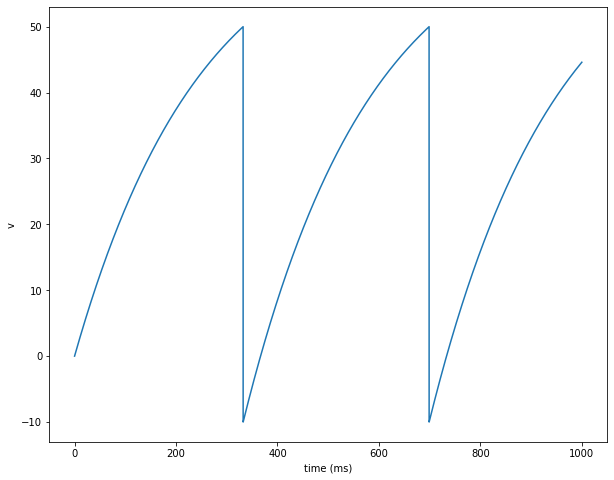

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_first_exc_V[100])

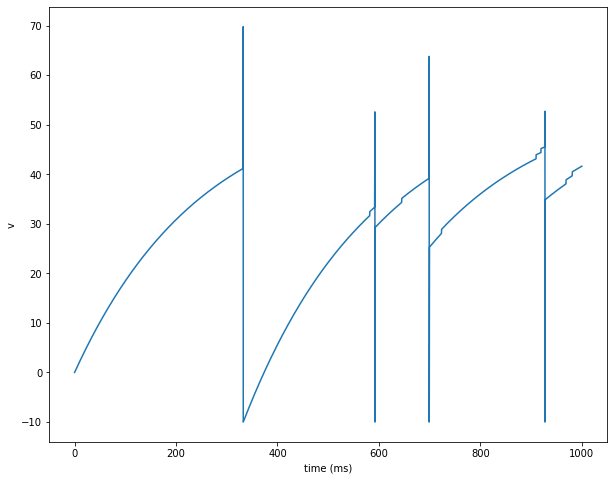

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(state_mon_second_exc_V[100])

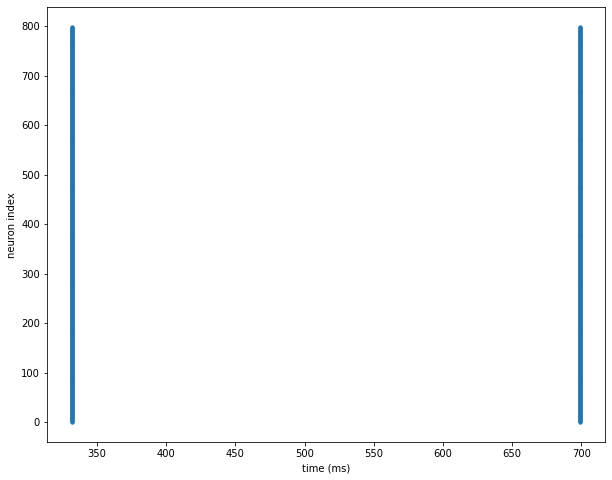

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_first_exc)

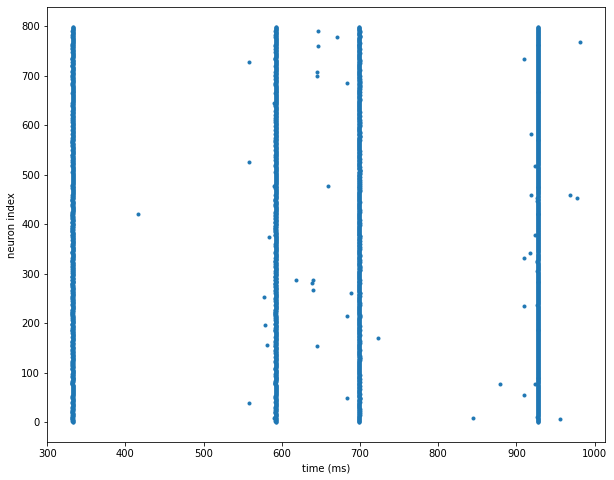

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_second_exc)

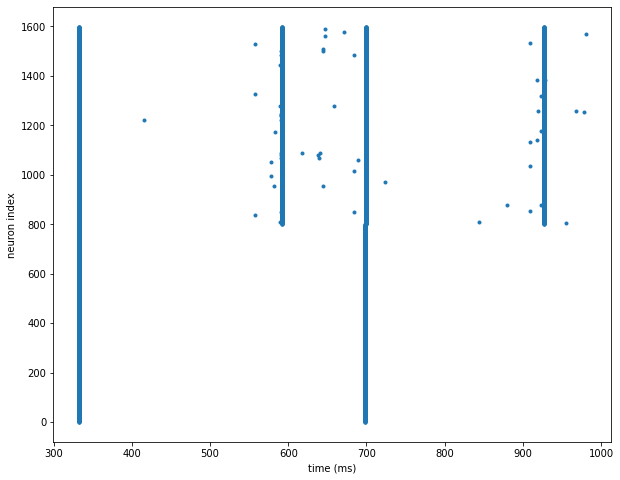

In [ ]:
plt.figure(figsize=(10,8))
brian_plot(spike_mon_G)

In [ ]:
print(f"total spike = {spike_mon_G.num_spikes} ")
print(f"first exc spike = {spike_mon_first_exc.num_spikes} ")
print(f"second exc spike = {spike_mon_second_exc.num_spikes} ")
print(f"inh spike = {spike_mon_inh.num_spikes} ")

total spike = 4843 
first exc spike = 1600 
second exc spike = 3243 
inh spike = 0 
